In [1]:


!pip install nltk
import nltk

nltk.download('punkt')
nltk.download('stopwords')
import pandas as pd
import re
import string
from bs4 import BeautifulSoup

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# New Section

In [3]:
df = pd.read_csv("/content/drive/MyDrive/NLP_Group 19/clean_csv.csv")

FileNotFoundError: ignored

In [ ]:
df

,Unnamed: 0,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet,Country,text_no_sw,tokenized_text,Tweet_stemmed,lemma
0,0,1340539111971516416,Rachel Roh,La Crescenta Montrose CA,Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False,USA,same folks said daikon paste could treat cytok...,"['same', 'folks', 'said', 'daikon', 'paste', '...","['same', 'folk', 'said', 'daikon', 'past', 'co...","['same', 'folk', 'said', 'daikon', 'paste', 'c..."
1,1,1338158543359250433,Albert Fong,San Francisco CA,"Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False,USA,while world wrong side history year hopefully ...,"['while', 'world', 'wrong', 'side', 'history',...","['while', 'world', 'wrong', 'side', 'histori',...","['while', 'world', 'wrong', 'side', 'history',..."
2,3,1337855739918835717,Charles Adler,Vancouver BC Canada,"Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,Facts are immutable Senator even when youre no...,NaN,Twitter Web App,446,2129,False,Canada,facts immutable senator even youre ethically s...,"['facts', 'immutable', 'senator', 'even', 'you...","['fact', 'immut', 'senat', 'even', 'your', 'et...","['fact', 'immutable', 'senator', 'even', 'your..."
3,6,1337851215875608579,Gunther Fehlinger,Austria Ukraine and Kosovo,End North Stream 2 now - the pipeline of corru...,2013-06-10 17:49:22,2731,5001,69344,False,2020-12-12 20:06:00,it is a bit sad to claim the fame for success ...,['vaccination'],Twitter Web App,0,4,False,Austria,bit sad claim fame success vaccination patriot...,"['bit', 'sad', 'claim', 'fame', 'success', 'va...","['bit', 'sad', 'claim', 'fame', 'success', 'va...","['bit', 'sad', 'claim', 'fame', 'success', 'va..."
4,10,1337841934170255365,Tamer Yazar,Turkey Israel,"Im Market Analyst, also Editor... working (fre...",2009-09-17 16:45:16,1302,78,339,False,2020-12-12 19:29:07,while deaths are closing in on the mark milli...,"['PfizerBioNTech', 'Vaccine']",Twitter Web App,0,0,False,Israel,deaths closing mark millions people wait pfize...,"['deaths', 'closing', 'mark', 'millions', 'peo...","['death', 'close', 'mark', 'million', 'peopl',...","['death', 'closing', 'mark', 'million', 'peopl..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99937,223282,1457218863737671680,VaxBLR,Bengaluru India,Hourly updates on FREE and PAID 18+ and 45+ va...,2021-06-21 08:44:34,31,0,0,False,2021-11-07 05:30:25,BBMP Bengaluru CovidVaccine Availability for ...,"['BBMP', 'Bengaluru', 'CovidVaccine', 'COVISHI...",VaxBlr,0,1,False,India,bbmp bengaluru covidvaccine availability am fr...,"['bbmp', 'bengaluru', 'covidvaccine', 'availab...","['bbmp', 'bengaluru', 'covidvaccin', 'avail', ...","['bbmp', 'bengaluru', 'covidvaccine', 'availab..."
99938,223283,1457203761676312585,VaxBLR,Bengaluru India,Hourly updates on FREE and PAID 18+ and 45+ va...,2021-06-21 08:44:34,31,0,0,False,2021-11-07 04:30:24,BBMP Bengaluru CovidVaccine Availability for ...,"['BBMP', 'Bengaluru', 'CovidVaccine', 'COVISHI...",VaxBlr,0,1,False,India,bbmp bengaluru covidvaccine availability am fr...,"['bbmp', 'bengaluru', 'covidvaccine', 'availab...","['bbmp', 'bengaluru', 'covidvaccin', 'avail', ...","['bbmp', 'bengaluru', 'covidvaccine', 'availab..."
99939,223284,1457188663230492674,VaxBLR,Bengaluru India,Hourly updates on FREE and PAID 18+ and 45+ va...,2021-06-21 08:44:34,31,0,0,False,2021-11-07 03:30:25,BBMP Bengaluru CovidVaccine Availability for ...,"['BBMP', 'Bengaluru', 'CovidVaccine', 'COVISHI...",VaxBlr,0,1,False,India,bbmp bengaluru covidvaccine availabili

In [4]:
!pip install text2emotion

     |████████████████████████████████| 57 kB 3.1 MB/s 
     |████████████████████████████████| 170 kB 8.9 MB/s 
  Created wheel for emoji: filename=emoji-1.6.1-py3-none-any.whl size=169314 sha256=15a21dd560f8d660a1576281fcae244fa51361861c382b8db45fbed7fb0e2c1d
  Stored in directory: /root/.cache/pip/wheels/ea/5f/d3/03d313ddb3c2a1a427bb4690f1621eea60fe6f2a30cc95940f
Successfully built emoji


In [5]:
!pip install nrclex

     |████████████████████████████████| 396 kB 5.3 MB/s 
  Created wheel for nrclex: filename=NRCLex-3.0.0-py3-none-any.whl size=43328 sha256=14eaab78c14637decd07194e686cbfefd2ee0c01a32252cbf1f2069ae392745f
  Stored in directory: /root/.cache/pip/wheels/af/2c/9c/dfa19d1b65326c520b32850a9311f6d4eda679ac04dba26081
Successfully built nrclex


In [6]:
from nrclex import NRCLex

In [ ]:
df = df[df['text_no_sw'].notna()]

In [ ]:
df.isna().sum()

In [10]:
import emoji

def give_emoji_free_text(self, text):
    allchars = [str for str in text]
    emoji_list = [c for c in allchars if c in emoji.UNICODE_EMOJI]
    clean_text = ' '.join([str for str in text.split() if not any(i in str for i in emoji_list)])

    return clean_text


In [ ]:

text_object = NRCLex(' '.join(df['text_no_sw']))

In [ ]:
text_object.affect_frequencies

{'anger': 0.055282524184070155,
 'anticip': 0.0,
 'anticipation': 0.08938432329807432,
 'disgust': 0.025820450230539735,
 'fear': 0.08836090769369859,
 'joy': 0.06663411988066179,
 'negative': 0.11779405117078022,
 'positive': 0.29461350691619204,
 'sadness': 0.0729264985082723,
 'surprise': 0.0619112196003978,
 'trust': 0.1272723985173131}

In [ ]:
def emotions(text):
  text = NRCLex(text)
  if text.top_emotions[0][1] == 0.0:
    return None
  else:
    return text.top_emotions[0][0]



In [ ]:
df['Emotion'] = df['text_no_sw'].apply(emotions)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df.head()

,Unnamed: 0,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet,Country,text_no_sw,tokenized_text,Tweet_stemmed,lemma,Emotion
0,0,1340539111971516416,Rachel Roh,La Crescenta Montrose CA,Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False,USA,same folks said daikon paste could treat cytok...,"['same', 'folks', 'said', 'daikon', 'paste', '...","['same', 'folk', 'said', 'daikon', 'past', 'co...","['same', 'folk', 'said', 'daikon', 'paste', 'c...",anger
1,1,1338158543359250433,Albert Fong,San Francisco CA,"Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False,USA,while world wrong side history year hopefully ...,"['while', 'world', 'wrong', 'side', 'history',...","['while', 'world', 'wrong', 'side', 'histori',...","['while', 'world', 'wrong', 'side', 'history',...",positive
2,3,1337855739918835717,Charles Adler,Vancouver BC Canada,"Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,Facts are immutable Senator even when youre no...,NaN,Twitter Web App,446,2129,False,Canada,facts immutable senator even youre ethically s...,"['facts', 'immutable', 'senator', 'even', 'you...","['fact', 'immut', 'senat', 'even', 'your', 'et...","['fact', 'immutable', 'senator', 'even', 'your...",positive
3,6,1337851215875608579,Gunther Fehlinger,Austria Ukraine and Kosovo,End North Stream 2 now - the pipeline of corru...,2013-06-10 17:49:22,2731,5001,69344,False,2020-12-12 20:06:00,it is a bit sad to claim the fame for success ...,['vaccination'],Twitter Web App,0,4,False,Austria,bit sad claim fame success vaccination patriot...,"['bit', 'sad', 'claim', 'fame', 'success', 'va...","['bit', 'sad', 'claim', 'fame', 'success', 'va...","['bit', 'sad', 'claim', 'fame', 'success', 'va...",positive
4,10,1337841934170255365,Tamer Yazar,Turkey Israel,"Im Market Analyst, also Editor... working (fre...",2009-09-17 16:45:16,1302,78,339,False,2020-12-12 19:29:07,while deaths are closing in on the mark milli...,"['PfizerBioNTech', 'Vaccine']",Twitter Web App,0,0,False,Israel,deaths closing mark millions people wait pfize...,"['deaths', 'closing', 'mark', 'millions', 'peo...","['death', 'close', 'mark', 'million', 'peopl',...","['death', 'closing', 'mark', 'million', 'peopl...",positive


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
emotion_no_na = df[df['Emotion'].notnull()]

In [ ]:
emotion_no_na.groupby('Emotion').size()

Emotion
anger            2765
anticipation     2127
disgust            31
fear            12586
joy                 4
negative         4748
positive        31510
sadness           106
surprise         1348
trust           12609
dtype: int64

(-1.1248717352070765,
 1.101184368343194,
 -1.131311962053348,
 1.1105769378432029)

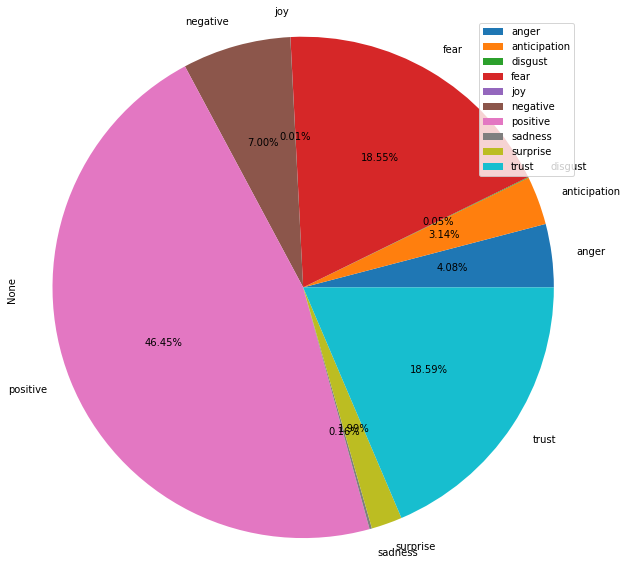

In [ ]:
#colors = sns.color_palette('pastel')[0:5]
plt.rcParams["figure.figsize"] = (10,10)
fig = emotion_no_na.groupby('Emotion').size().plot(kind='pie', autopct='%.2f%%')
fig.legend()
plt.axis('equal')

In [11]:
!pip install vaderSentiment

     |████████████████████████████████| 125 kB 5.6 MB/s 


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [ ]:
def scores(string):
  string = analyzer.polarity_scores(string)
  return string

In [ ]:
emotion_no_na['scores'] = emotion_no_na['text_no_sw'].apply(lambda x: scores(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
emotion_no_na.reset_index(inplace=True)

In [ ]:
emotion_no_na.columns

Index(['index', 'Unnamed: 0', 'id', 'user_name', 'user_location',
       'user_description', 'user_created', 'user_followers', 'user_friends',
       'user_favourites', 'user_verified', 'date', 'text', 'hashtags',
       'source', 'retweets', 'favorites', 'is_retweet', 'Country',
       'text_no_sw', 'tokenized_text', 'Tweet_stemmed', 'lemma', 'Emotion',
       'scores'],
      dtype='object')

In [ ]:
emotion_new = pd.json_normalize(emotion_no_na['scores'])

In [ ]:
emotion_new.reset_index(inplace=True)

In [ ]:
emotion_new

,index,neg,neu,pos,compound
0,0,0.000,0.769,0.231,0.4019
1,1,0.196,0.633,0.171,-0.1027
2,2,0.000,1.000,0.000,0.0000
3,3,0.175,0.452,0.373,0.5423
4,4,0.000,1.000,0.000,0.0000
...,...,...,...,...,...
67829,67829,0.000,1.000,0.000,0.0000
67830,67830,0.000,0.784,0.216,0.5106
67831,67831,0.000,1.000,0.000,0.0000
67832,67832,0.000,1.000,0.000,0.0000


In [ ]:
emotion_no_na=emotion_no_na.drop(columns='Unnamed: 0')

In [ ]:
emotion_no_na.reset_index(inplace=True)

In [ ]:
emotion_no_na=emotion_no_na.drop(columns='index')

In [ ]:
emotion_no_na

,level_0,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet,Country,text_no_sw,tokenized_text,Tweet_stemmed,lemma,Emotion,scores
0,0,1340539111971516416,Rachel Roh,La Crescenta Montrose CA,Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False,USA,same folks said daikon paste could treat cytok...,"['same', 'folks', 'said', 'daikon', 'paste', '...","['same', 'folk', 'said', 'daikon', 'past', 'co...","['same', 'folk', 'said', 'daikon', 'paste', 'c...",anger,"{'neg': 0.0, 'neu': 0.769, 'pos': 0.231, 'comp..."
1,1,1338158543359250433,Albert Fong,San Francisco CA,"Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False,USA,while world wrong side history year hopefully ...,"['while', 'world', 'wrong', 'side', 'history',...","['while', 'world', 'wrong', 'side', 'histori',...","['while', 'world', 'wrong', 'side', 'history',...",positive,"{'neg': 0.196, 'neu': 0.633, 'pos': 0.171, 'co..."
2,2,1337855739918835717,Charles Adler,Vancouver BC Canada,"Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,Facts are immutable Senator even when youre no...,NaN,Twitter Web App,446,2129,False,Canada,facts immutable senator even youre ethically s...,"['facts', 'immutable', 'senator', 'even', 'you...","['fact', 'immut', 'senat', 'even', 'your', 'et...","['fact', 'immutable', 'senator', 'even', 'your...",positive,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
3,3,1337851215875608579,Gunther Fehlinger,Austria Ukraine and Kosovo,End North Stream 2 now - the pipeline of corru...,2013-06-10 17:49:22,2731,5001,69344,False,2020-12-12 20:06:00,it is a bit sad to claim the fame for success ...,['vaccination'],Twitter Web App,0,4,False,Austria,bit sad claim fame success vaccination patriot...,"['bit', 'sad', 'claim', 'fame', 'success', 'va...","['bit', 'sad', 'claim', 'fame', 'success', 'va...","['bit', 'sad', 'claim', 'fame', 'success', 'va...",positive,"{'neg': 0.175, 'neu': 0.452, 'pos': 0.373, 'co..."
4,4,1337841934170255365,Tamer Yazar,Turkey Israel,"Im Market Analyst, also Editor... working (fre...",2009-09-17 16:45:16,1302,78,339,False,2020-12-12 19:29:07,while deaths are closing in on the mark milli...,"['PfizerBioNTech', 'Vaccine']",Twitter Web App,0,0,False,Israel,deaths closing mark millions people wait pfize...,"['deaths', 'closing', 'mark', 'millions', 'peo...","['death', 'close', 'mark', 'million', 'peopl',...","['death', 'closing', 'mark', 'million', 'peopl...",positive,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67829,67829,1457288418019319809,World News,NY,Get all the news here.,2021-07-27 09:25:31,168,17,106,False,2021-11-07 10:06:48,Foreign citizens seek USapproved shots as trav...,"['unitedstates', 'travel', 'europe', 'northame...",Twits Tweets,0,0,False,USA,foreign citizens seek usapproved shots travel ...,"['foreign', 'citizens', 'seek', 'usapproved', ...","['foreign', 'citizen', 'seek', 'usapprov', 'sh...","['foreign', 'citizen', 'seek', 'usapproved', '...",negative,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
67830,67830,1457282930217259009,The Peninsula Qatar,Qatar,News you can trust. Local Focus Global Vision....,2009-07-25 08:41:05,60084,236,768,True,2021-11-07 09:45:00,many hopeful travelers across the globe who ta...,['travelers'],TweetDeck,0,1,False,Qatar,many hopeful travelers across globe taken full...,"['many', 'hopeful', 'travelers', 'across', 'gl...","['mani', 'hope', 'travel', 'across', 'globe', ...","['many', 'hopeful', 'traveler', 'across', 'g

In [ ]:
emotion_new = emotion_no_na.merge(emotion_new,right_on='index',left_on='level_0',how = 'left')

In [ ]:
emotion_new.head()


,level_0,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet,Country,text_no_sw,tokenized_text,Tweet_stemmed,lemma,Emotion,scores,index,neg,neu,pos,compound
0,0,1340539111971516416,Rachel Roh,La Crescenta Montrose CA,Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False,USA,same folks said daikon paste could treat cytok...,"['same', 'folks', 'said', 'daikon', 'paste', '...","['same', 'folk', 'said', 'daikon', 'past', 'co...","['same', 'folk', 'said', 'daikon', 'paste', 'c...",anger,"{'neg': 0.0, 'neu': 0.769, 'pos': 0.231, 'comp...",0,0.000,0.769,0.231,0.4019
1,1,1338158543359250433,Albert Fong,San Francisco CA,"Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False,USA,while world wrong side history year hopefully ...,"['while', 'world', 'wrong', 'side', 'history',...","['while', 'world', 'wrong', 'side', 'histori',...","['while', 'world', 'wrong', 'side', 'history',...",positive,"{'neg': 0.196, 'neu': 0.633, 'pos': 0.171, 'co...",1,0.196,0.633,0.171,-0.1027
2,2,1337855739918835717,Charles Adler,Vancouver BC Canada,"Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,Facts are immutable Senator even when youre no...,NaN,Twitter Web App,446,2129,False,Canada,facts immutable senator even youre ethically s...,"['facts', 'immutable', 'senator', 'even', 'you...","['fact', 'immut', 'senat', 'even', 'your', 'et...","['fact', 'immutable', 'senator', 'even', 'your...",positive,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",2,0.000,1.000,0.000,0.0000
3,3,1337851215875608579,Gunther Fehlinger,Austria Ukraine and Kosovo,End North Stream 2 now - the pipeline of corru...,2013-06-10 17:49:22,2731,5001,69344,False,2020-12-12 20:06:00,it is a bit sad to claim the fame for success ...,['vaccination'],Twitter Web App,0,4,False,Austria,bit sad claim fame success vaccination patriot...,"['bit', 'sad', 'claim', 'fame', 'success', 'va...","['bit', 'sad', 'claim', 'fame', 'success', 'va...","['bit', 'sad', 'claim', 'fame', 'success', 'va...",positive,"{'neg': 0.175, 'neu': 0.452, 'pos': 0.373, 'co...",3,0.175,0.452,0.373,0.5423
4,4,1337841934170255365,Tamer Yazar,Turkey Israel,"Im Market Analyst, also Editor... working (fre...",2009-09-17 16:45:16,1302,78,339,False,2020-12-12 19:29:07,while deaths are closing in on the mark milli...,"['PfizerBioNTech', 'Vaccine']",Twitter Web App,0,0,False,Israel,deaths closing mark millions people wait pfize...,"['deaths', 'closing', 'mark', 'millions', 'peo...","['death', 'close', 'mark', 'million', 'peopl',...","['death', 'closing', 'mark', 'million', 'peopl...",positive,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",4,0.000,1.000,0.000,0.0000


statistical analysis

thoughts: groupby country, take average on compound, analyze with vacc rate by country

simple regression model

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/NLP_Group 19/country_vaccinations.csv")

In [ ]:
df.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/


In [ ]:
df['Country'] = df['country']

In [ ]:
filter_df = df.loc[:, ~df.columns.isin(['country', 'iso_code','source_name','source_website'])]

In [ ]:
filter_df.head()

,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,Country
0,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",Afghanistan
1,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",Afghanistan
2,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",Afghanistan
3,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",Afghanistan
4,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",Afghanistan


In [ ]:
whole_clean_df = pd.merge(emotion_new, filter_df,left_on=['Country','date'],right_on=['Country','date'],how='left')

In [ ]:
whole_clean_df.head()

,level_0,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet,Country,text_no_sw,tokenized_text,Tweet_stemmed,lemma,Emotion,scores,index,neg,neu,pos,compound,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines
0,0,1340539111971516416,Rachel Roh,La Crescenta Montrose CA,Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False,USA,same folks said daikon paste could treat cytok...,"['same', 'folks', 'said', 'daikon', 'paste', '...","['same', 'folk', 'said', 'daikon', 'past', 'co...","['same', 'folk', 'said', 'daikon', 'paste', 'c...",anger,"{'neg': 0.0, 'neu': 0.769, 'pos': 0.231, 'comp...",0,0.000,0.769,0.231,0.4019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1338158543359250433,Albert Fong,San Francisco CA,"Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False,USA,while world wrong side history year hopefully ...,"['while', 'world', 'wrong', 'side', 'history',...","['while', 'world', 'wrong', 'side', 'histori',...","['while', 'world', 'wrong', 'side', 'history',...",positive,"{'neg': 0.196, 'neu': 0.633, 'pos': 0.171, 'co...",1,0.196,0.633,0.171,-0.1027,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1337855739918835717,Charles Adler,Vancouver BC Canada,"Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,Facts are immutable Senator even when youre no...,NaN,Twitter Web App,446,2129,False,Canada,facts immutable senator even youre ethically s...,"['facts', 'immutable', 'senator', 'even', 'you...","['fact', 'immut', 'senat', 'even', 'your', 'et...","['fact', 'immutable', 'senator', 'even', 'your...",positive,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",2,0.000,1.000,0.000,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1337851215875608579,Gunther Fehlinger,Austria Ukraine and Kosovo,End North Stream 2 now - the pipeline of corru...,2013-06-10 17:49:22,2731,5001,69344,False,2020-12-12 20:06:00,it is a bit sad to claim the fame for success ...,['vaccination'],Twitter Web App,0,4,False,Austria,bit sad claim fame success vaccination patriot...,"['bit', 'sad', 'claim', 'fame', 'success', 'va...","['bit', 'sad', 'claim', 'fame', 'success', 'va...","['bit', 'sad', 'claim', 'fame', 'success', 'va...",positive,"{'neg': 0.175, 'neu': 0.452, 'pos': 0.373, 'co...",3,0.175,0.452,0.373,0.5423,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1337841934170255365,Tamer Yazar,Turkey Israel,"Im Market Analyst, also Editor... working (fre...",2009-09-17 16:45:16,1302,78,339,False,2020-12-12 19:29:07,while deaths are closing in on the mark milli...,"['PfizerBioNTech', 'Vaccine']",Twitter Web App,0,0,False,Israel,deaths closing mark millions people wait pfize...,"['deaths', 'closing', 'mark', 'millions', 'peo...","['death', 'close', 'mark', 'million', 'peopl',...","['death', 'closing', 'mark', 'million', 'peopl...",positive,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",4,0.000,1.000,0.000,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
whole_clean_df = whole_clean_df.loc[:, ~whole_clean_df.columns.isin(['level_0', 'user_name','user_description','source_website','user_created','index'])]

In [ ]:
whole_clean_df.to_csv("/content/drive/MyDrive/NLP_Group 19/whole_clean_df.csv")

In [ ]:
#LDA

In [ ]:
#groupby country and choose the max vaccination rate to get the newest date's data
Country_rate = df.groupby(['country'], sort=False)['people_fully_vaccinated_per_hundred'].max().to_frame().reset_index()
Country_rate = Country_rate.rename({'people_fully_vaccinated_per_hundred':'vaccination_rate'}, axis=1)
Country_rate

,country,vaccination_rate
0,Afghanistan,8.00
1,Albania,32.60
2,Algeria,11.05
3,Andorra,64.04
4,Angola,6.72
...,...,...
218,Wales,71.15
219,Wallis and Futuna,52.91
220,Yemen,1.15
221,Zambia,3.32


In [ ]:
#groupby country to get average sentiment score on each country
Emotion_score = emotion_new.groupby(['Country'], sort=False)['compound'].mean().to_frame().reset_index()
Emotion_score = Emotion_score.rename({'Country':'country'}, axis=1)
Emotion_score

,country,compound
0,USA,0.128878
1,Canada,-0.125541
2,Austria,0.106167
3,Israel,0.033411
4,India,0.142788
...,...,...
161,Angola,0.482150
162,Costa Rica,0.000000
163,Eritrea,0.000000
164,Mayotte,0.000000


In [ ]:
#merge compound and vaccination rate by country
score_new = pd.merge(Country_rate, Emotion_score, on='country')
score_new

,country,vaccination_rate,compound
0,Afghanistan,8.00,0.264812
1,Albania,32.60,0.080371
2,Algeria,11.05,0.072500
3,Andorra,64.04,0.097200
4,Angola,6.72,0.482150
...,...,...,...
152,Uruguay,75.71,0.182033
153,Uzbekistan,17.33,0.187150
154,Yemen,1.15,0.690950
155,Zambia,3.32,0.000000


In [ ]:
freq_df = whole_clean_df.groupby(['Country']).size()

In [ ]:
freq_df

Country
Afghanistan     16
Albania         31
Algeria          8
Andorra          3
Angola           2
              ... 
Uzbekistan       8
Viet Nam         2
Yemen            2
Zambia           1
Zimbabwe       245
Length: 166, dtype: int64

In [ ]:
freq_df = freq_df.to_frame()

In [ ]:
freq_df.columns = ['Freq']

In [ ]:
freq_df = freq_df.sort_values(['Freq'], ascending=False)

In [ ]:
freq_df = freq_df.head(10)

In [ ]:
freq_df

,Freq
Country,
USA,22875
India,22435
Canada,4527
Pakistan,1525
Sri Lanka,1406
China,1281
United Kingdom,913
Malaysia,892
Philippines,829


(-1.1047902413105184,
 1.1002281067290722,
 -1.121888386006483,
 1.1186273554376176)

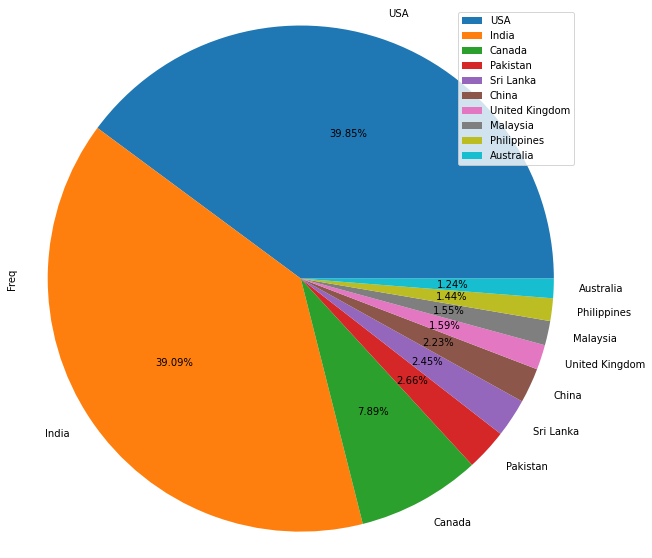

In [ ]:
plt.rcParams["figure.figsize"] = (10,10)
fig = freq_df.plot(kind='pie', subplots=True,autopct='%.2f%%')#, figsize=(16,8))
#fig.legend()
plt.axis('equal')

In [15]:
#simple linear regression (I will add more models later - Tong)
import statsmodels.api as sm
import statsmodels.formula.api as smf
lm = smf.ols(formula = 'vaccination_rate~compound', data = score_new).fit()
print (lm.summary())

NameError: ignored




Hypothesis Tests (Cong Zhang)

In [21]:
twitter_hypothesis_df = pd.read_csv("/content/twitter_hypothesis_0.05.csv")
lm_positive = smf.ols(formula = 'Positive_Attitude_Rate ~ Time', data = twitter_hypothesis_df).fit()
print (lm_positive.summary())

                              OLS Regression Results                              
Dep. Variable:     Positive_Attitude_Rate   R-squared:                       0.047
Model:                                OLS   Adj. R-squared:                  0.046
Method:                     Least Squares   F-statistic:                     55.66
Date:                    Sat, 18 Dec 2021   Prob (F-statistic):           1.70e-13
Time:                            04:18:33   Log-Likelihood:                 1969.8
No. Observations:                    1141   AIC:                            -3936.
Df Residuals:                        1139   BIC:                            -3925.
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   

In [22]:
lm_neutral = smf.ols(formula = 'Neutral_Attitude_Rate ~ Time', data = twitter_hypothesis_df).fit()
print (lm_neutral.summary())

                              OLS Regression Results                             
Dep. Variable:     Neutral_Attitude_Rate   R-squared:                       0.005
Model:                               OLS   Adj. R-squared:                  0.005
Method:                    Least Squares   F-statistic:                     6.253
Date:                   Sat, 18 Dec 2021   Prob (F-statistic):             0.0125
Time:                           04:22:07   Log-Likelihood:                 1652.2
No. Observations:                   1141   AIC:                            -3300.
Df Residuals:                       1139   BIC:                            -3290.
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4015 

In [23]:
lm_negative = smf.ols(formula = 'Negative_Attitude_Rate ~ Time', data = twitter_hypothesis_df).fit()
print (lm_negative.summary())

                              OLS Regression Results                              
Dep. Variable:     Negative_Attitude_Rate   R-squared:                       0.031
Model:                                OLS   Adj. R-squared:                  0.030
Method:                     Least Squares   F-statistic:                     36.81
Date:                    Sat, 18 Dec 2021   Prob (F-statistic):           1.77e-09
Time:                            04:24:51   Log-Likelihood:                 2400.9
No. Observations:                    1141   AIC:                            -4798.
Df Residuals:                        1139   BIC:                            -4788.
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   

In [24]:
#simple linear regression
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as pd
import re
import string
vaccinations_df = pd.read_csv("/content/vaccinations_hypothesis.csv")
lm_positive = smf.ols(formula = 'Monthly_Vaccinations ~ Time', data = vaccinations_df).fit()
print (lm_positive.summary())

                             OLS Regression Results                             
Dep. Variable:     Monthly_Vaccinations   R-squared:                       0.358
Model:                              OLS   Adj. R-squared:                  0.358
Method:                   Least Squares   F-statistic:                     1196.
Date:                  Sat, 18 Dec 2021   Prob (F-statistic):          1.61e-208
Time:                          04:26:51   Log-Likelihood:                -44690.
No. Observations:                  2142   AIC:                         8.938e+04
Df Residuals:                      2140   BIC:                         8.939e+04
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.443e+08   1.59e+07